In [1]:
import os
import sys

# Get the path to the `src` directory
src_path = os.path.relpath('..')
sys.path.append(src_path)

from typing import List
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from src.types import *
from src.clustering.random import RandomClustering
from src.clustering.louvain import LouvainClustering
from src.clustering.greedy import GreedyClustering

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

%load_ext autoreload
%autoreload 2

---
### 1 - Select Periods - Build Graph

In [34]:
# Path
data_path = os.path.relpath('../data/CAC40/FR_2013')

# Load data from a JSONL file
market = Market.loader('2013/10/01','2013/10/15', data_path)

100%|██████████| 48/48 [15:12<00:00, 19.01s/it]


In [35]:
# Get periods of length 15
periods = market.get_periods(period_length=3600)
print(f"Number of periods: {len(periods)}")

Number of periods: 70


In [15]:
(periods[-6].feature_vector)

array([-1.94176144e-03,  7.49190887e-02,  8.26902502e-02, -2.12856414e+00,
                   nan,             nan,             nan,             nan,
        1.29743889e-03, -5.84221945e-01,  2.00025636e-01, -1.67349090e+01,
        4.06960206e-03, -5.12070163e-01,  1.13912904e-01,  5.38327645e+00,
        9.23050582e-04, -7.10122239e-01,  2.09302326e-02, -3.71599283e+00,
        1.88433926e-03, -4.70802676e-01, -8.04388890e-02,  8.47945007e-01,
        7.54129912e-04, -7.23279060e-01,  3.53517322e-01,  1.55599426e+00,
        4.02985781e-03, -2.43555043e-01,  1.34145503e-01, -6.32687717e+00,
        4.13483241e-03, -6.25067840e-01,  3.56582324e-01, -2.93982136e+00,
        3.70910076e-03, -5.29937504e-01, -1.00327248e-01,  1.08089338e+00,
       -8.02545601e-04,  3.21167678e-01, -2.66781883e-01, -8.55279955e-01,
        5.04008878e-04, -5.44761078e-01, -1.22820600e-01, -6.04302853e-01,
        6.18663013e-03, -4.43643829e-01, -2.84395697e-01,  1.64838377e+00,
        1.71211771e-03, -

In [27]:
datetime.fromtimestamp(periods[7].start)

datetime.datetime(2009, 10, 2, 16, 0)

In [26]:
periods[7].start

array([-1.        , -1.        , -1.        , -1.        ,         nan,
               nan, -0.07451225, -1.15887268, -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.  

[[ 1.         -0.01326431  0.31482206 ...  0.05670182  0.14349724
   0.34523486]
 [-0.01326431  1.         -0.13157859 ... -0.05492175  0.1077851
  -0.10858148]
 [ 0.31482206 -0.13157859  1.         ...  0.01137302  0.23457852
   0.22372273]
 ...
 [ 0.05670182 -0.05492175  0.01137302 ...  1.          0.01526922
  -0.11334766]
 [ 0.14349724  0.1077851   0.23457852 ...  0.01526922  1.
   0.29816912]
 [ 0.34523486 -0.10858148  0.22372273 ... -0.11334766  0.29816912
   1.        ]]


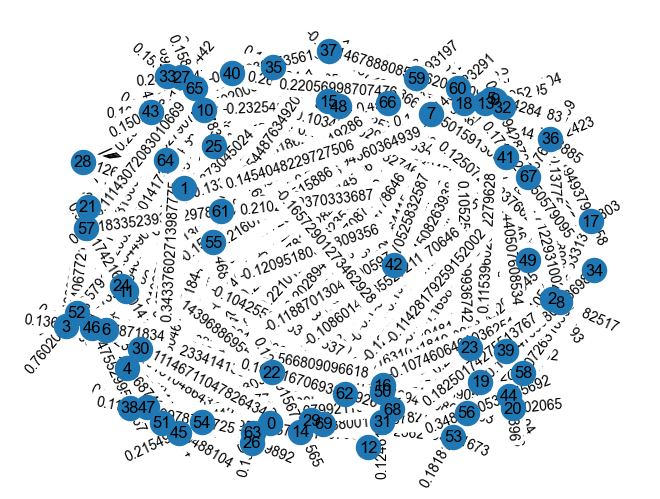

In [47]:
# Build the graph
state_graph = market.build_graph(periods, threshold=0.1, inter=True, filter_type='g')


---
### 2 - Clustering

### 2.1 - Louvain Clustering

In [48]:
# Clustering process
clustering = LouvainClustering().fit(periods, G=state_graph)

# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 70
Number of clusters: 8
Cluster sizes: [13, 6, 5, 9, 11, 9, 9, 7]
Transition matrix: 
[[0.30769231 0.07692308 0.15384615 0.23076923 0.         0.15384615
  0.         0.07692308]
 [0.16666667 0.16666667 0.         0.16666667 0.16666667 0.
  0.33333333 0.        ]
 [0.2        0.2        0.         0.         0.         0.2
  0.         0.4       ]
 [0.22222222 0.11111111 0.         0.11111111 0.33333333 0.11111111
  0.         0.11111111]
 [0.09090909 0.         0.09090909 0.09090909 0.27272727 0.18181818
  0.27272727 0.        ]
 [0.         0.11111111 0.         0.22222222 0.44444444 0.
  0.11111111 0.11111111]
 [0.22222222 0.         0.11111111 0.11111111 0.11111111 0.22222222
  0.11111111 0.11111111]
 [0.28571429 0.         0.14285714 0.         0.         0.14285714
  0.28571429 0.14285714]]


Count of periods per time:
08:00 : 8
09:00 : 8
10:00 : 9
11:00 : 9
12:00 : 9
13:00 : 9
14:00 : 9
15:00 : 8


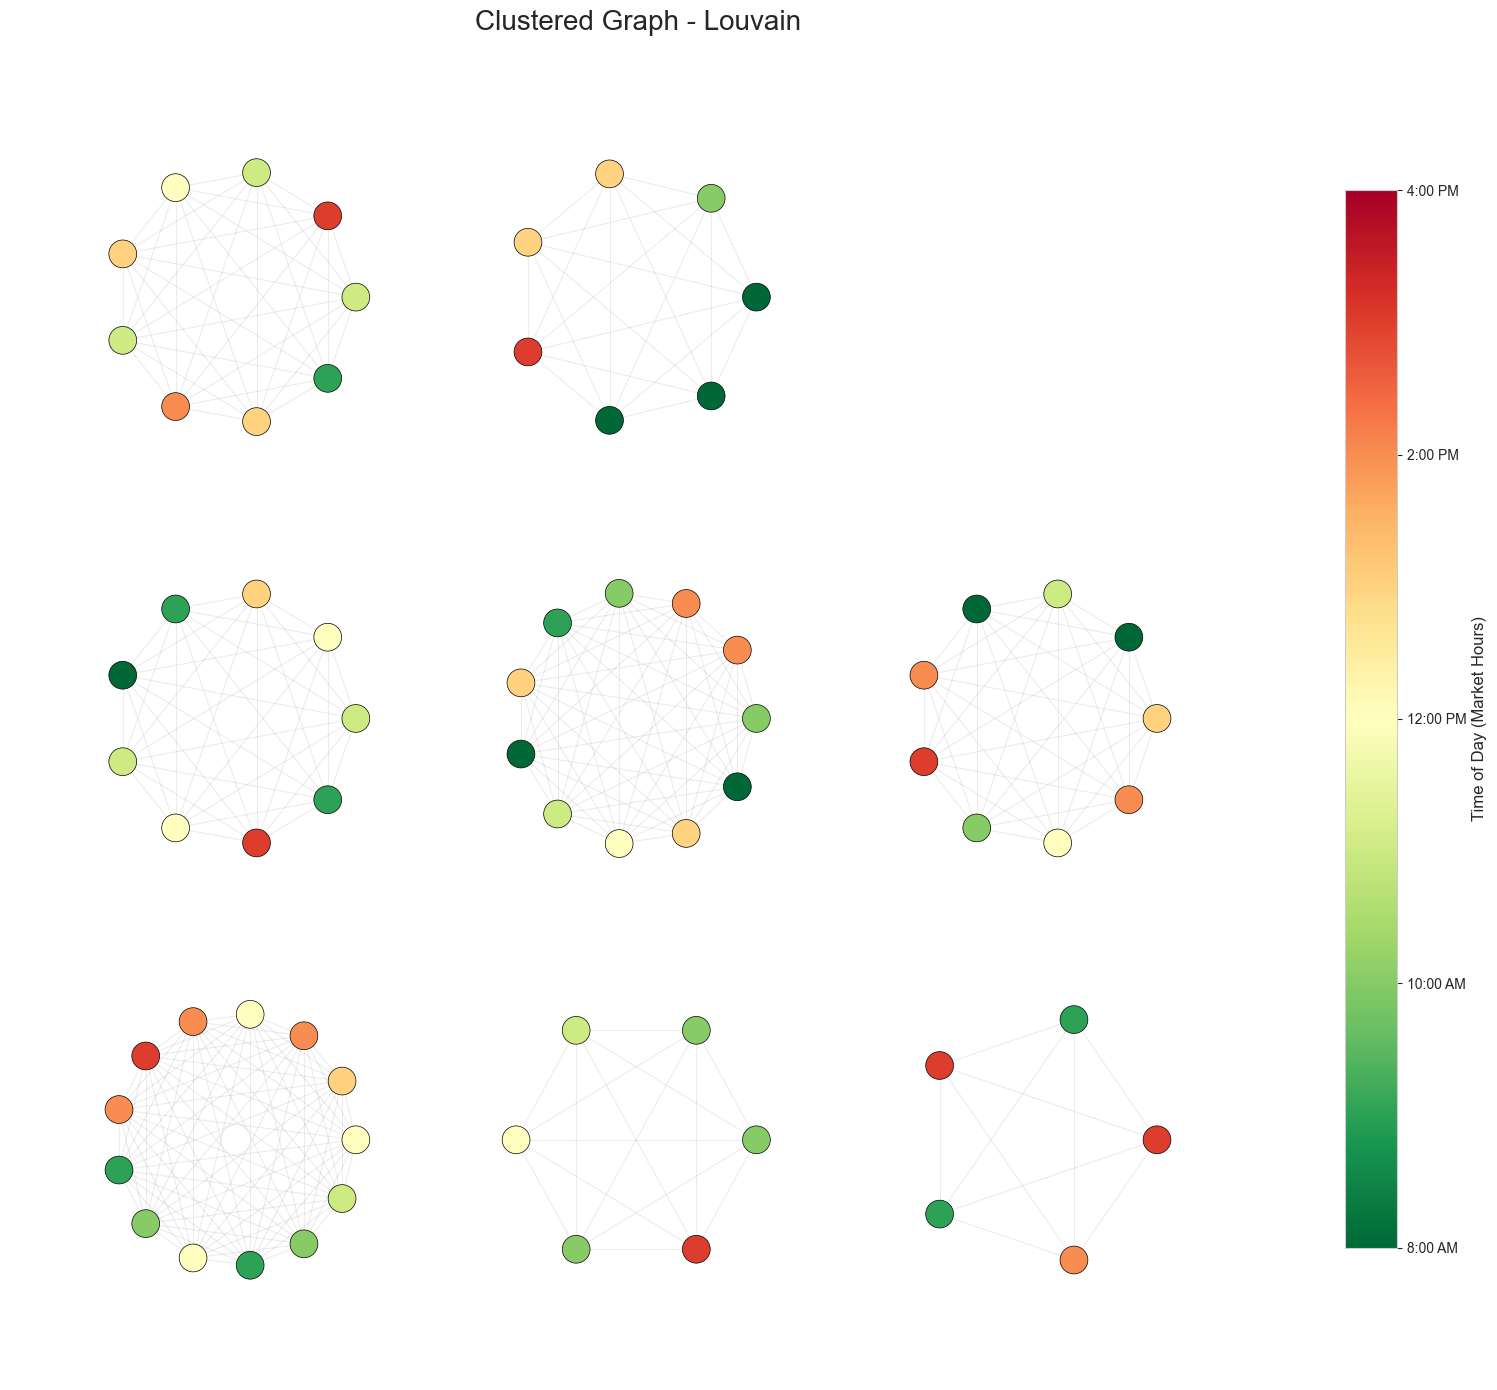

In [49]:
clustering.plot_cluster_2(method='Louvain')

### 2.2 - Greedy Clustering

In [50]:
clustering = GreedyClustering().fit(periods, G=state_graph)

# Get the clusters
clusters = clustering.clusters

print(f"Number of periods: {len(periods)}")
print(f"Number of clusters: {len(clusters)}")
print(f"Cluster sizes: {[len(cluster) for cluster in clusters]}")
#print(f"Cluster centers: {clustering.cluster_centers}")
print(f"Transition matrix: \n{clustering.transition_matrix}")

Number of periods: 70
Number of clusters: 7
Cluster sizes: [15, 14, 13, 8, 8, 6, 5]
Transition matrix: 
[[0.06666667 0.2        0.13333333 0.26666667 0.13333333 0.2
  0.        ]
 [0.28571429 0.21428571 0.28571429 0.07142857 0.         0.07142857
  0.07142857]
 [0.15384615 0.15384615 0.23076923 0.         0.23076923 0.07692308
  0.15384615]
 [0.25       0.125      0.         0.375      0.125      0.
  0.125     ]
 [0.         0.5        0.25       0.         0.125      0.
  0.125     ]
 [0.5        0.         0.33333333 0.16666667 0.         0.
  0.        ]
 [0.6        0.         0.         0.         0.2        0.2
  0.        ]]


Count of periods per time:
08:00 : 8
09:00 : 8
10:00 : 9
11:00 : 9
12:00 : 9
13:00 : 9
14:00 : 9
15:00 : 8


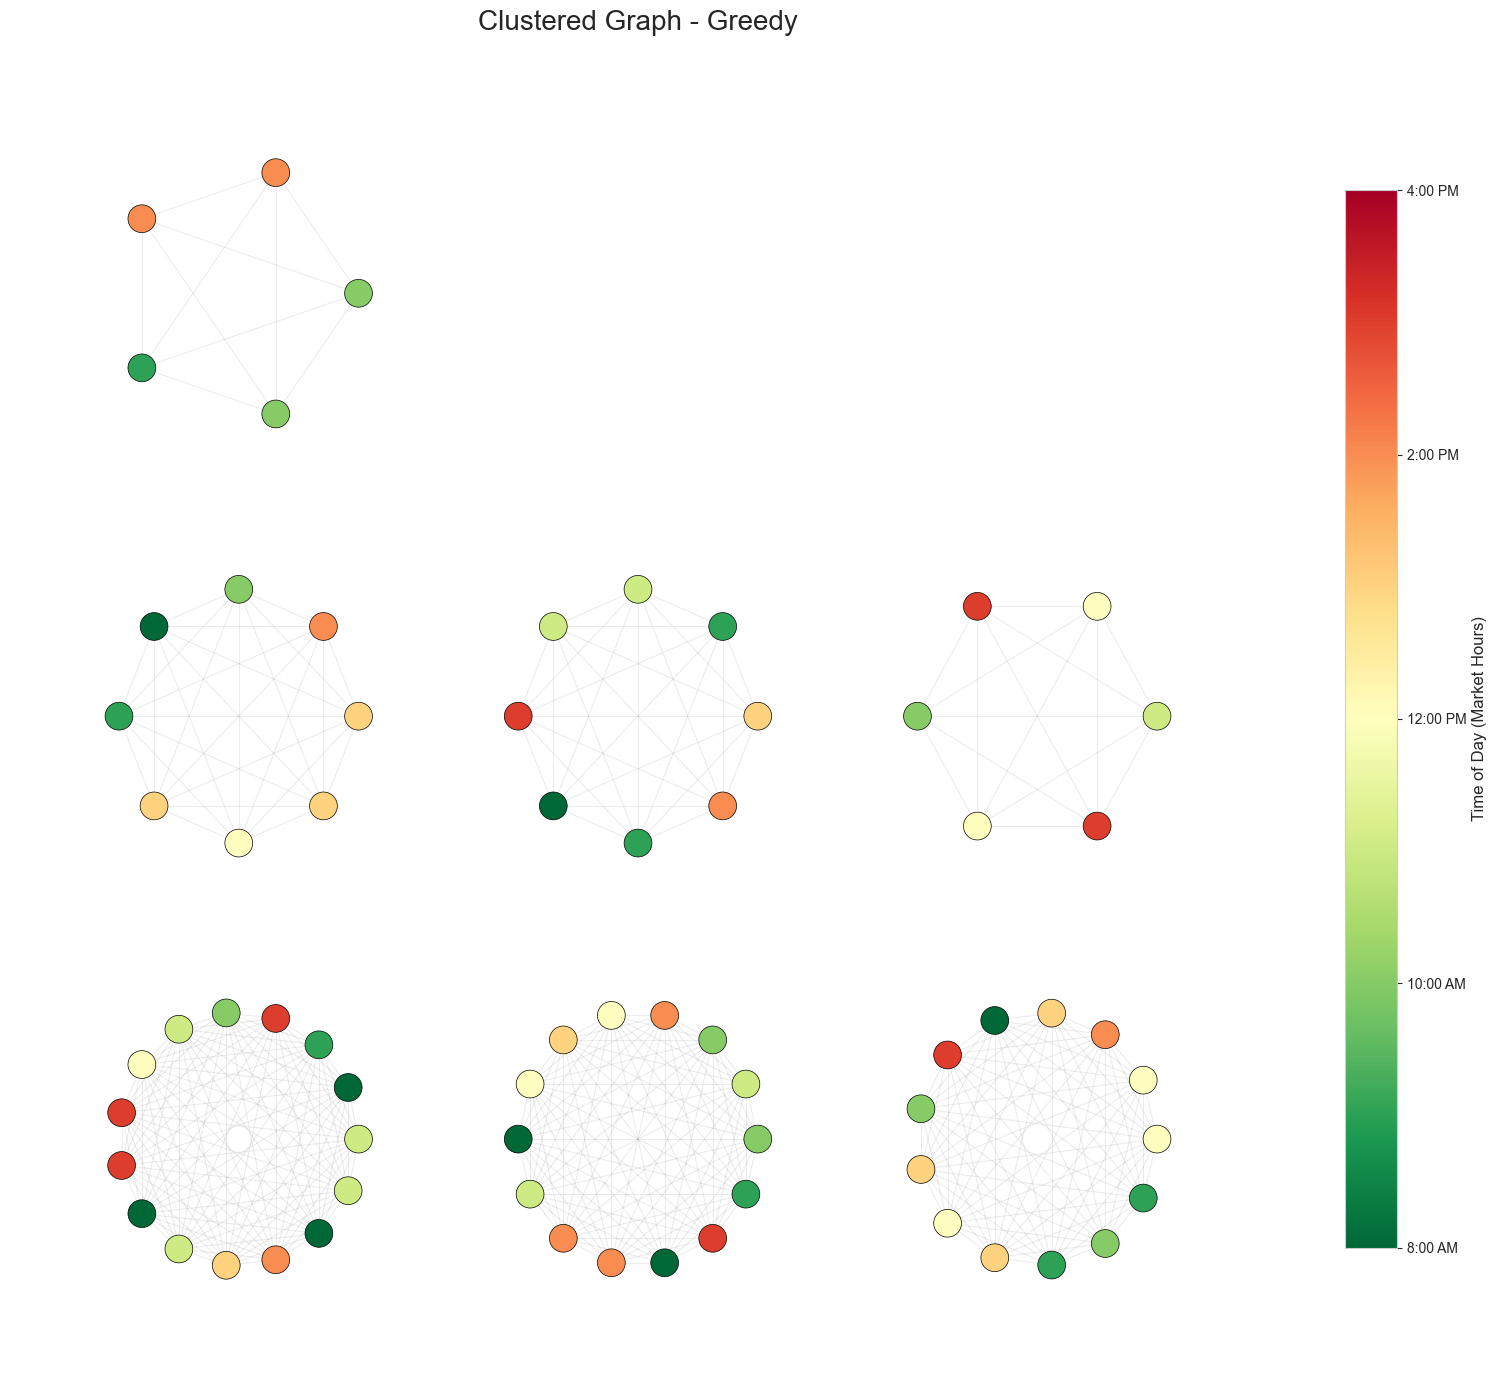

In [51]:
clustering.plot_cluster_2(method='Greedy')